##### Problema de Negócio:

Usando dados históricos é possível prever o salário de alguém com base no tempo dedicado aos estudos em horas por mês?

In [1]:
# Bibliotecas utilizadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Carregando os Dados

In [2]:
# Carrega o dataset
df = pd.read_csv('dataset.csv')
df.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


### Análise Exploratória - Resumo Estatístico

In [7]:
# Verificando valores ausentes
df.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [8]:
# Correlação entre as variáveis
df.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [9]:
# Resumo estatístico do dataset 
df.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


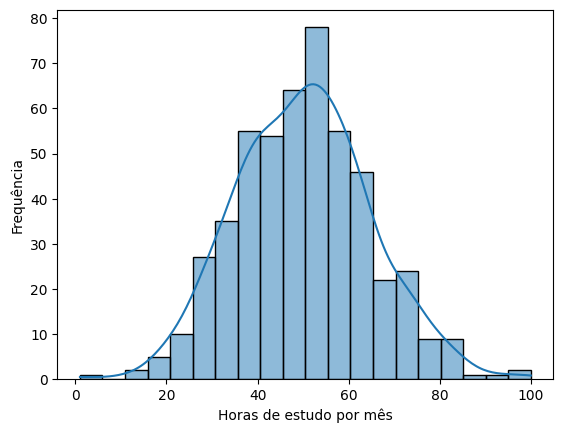

In [10]:
# Histograma da variável preditora
ax = sns.histplot(data = df, x = "horas_estudo_mes", kde = True)
ax.set_xlabel('Horas de estudo por mês')
ax.set_ylabel('Frequência')
plt.show()

### Preparação dos Dados

In [11]:
# Preparando a variável de entrada X
X = np.array(df['horas_estudo_mes'])

# Ajustando o shape de X
X = X.reshape(-1, 1)

# Preparando a variável alvo
y = df['salario']

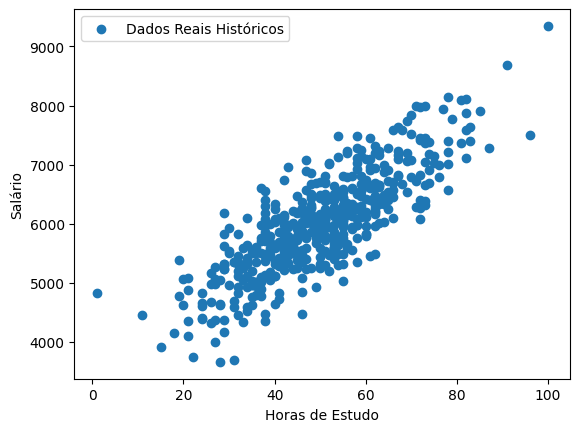

In [13]:
# Gráfico de dispersão entre as duas variáveis
plt.scatter(X, y, label = "Dados Reais Históricos")
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

In [14]:
# Dividindo dados em treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Modelagem Preditiva

In [16]:
# Criando modelo de regressão linear simples
modelo = LinearRegression()

# Treinando modelo
modelo.fit(X_treino, y_treino)

LinearRegression()

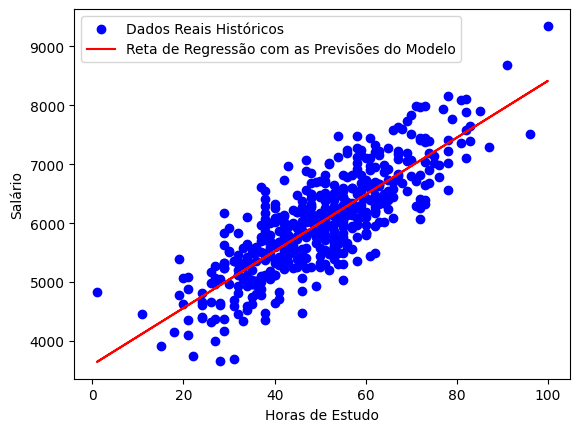

In [17]:
# Visualizando os dados reais e a previsão
plt.scatter(X, y, color = "blue", label = "Dados Reais Históricos")
plt.plot(X, modelo.predict(X), color = "red", label = "Reta de Regressão com as Previsões do Modelo")
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.savefig('images/resultado.png')
plt.show()

In [18]:
# Avaliando o modelo
score = modelo.score(X_teste, y_teste)
print(f"Coeficiente R^2: {score:.2f}")

Coeficiente R^2: 0.59


### Deploy do Modelo

Usando o modelo para prever o salário com base nas horas de estudo.

In [19]:
horas_de_estudo = int(input("Digite a quantidade de horas de estudo por mês: "))
horas_de_estudo = np.array([[horas_de_estudo]])

salario_previsto = modelo.predict(horas_de_estudo)

print(f"Se você estudar cerca de {float(horas_de_estudo)} horas por mês, seu salário pode ser igual a R$ {round(float(salario_previsto), 2)}")


Se você estudar cerca de 65.0 horas por mês, seu salário pode ser igual a R$ 6728.6
